# 神经网络模型的应用

**实验任务：** 基于波士顿房价数据集、鸢尾花卉数据集和多个合成数据集训练神经网络模型

**实验课时：** 2课时

**实验目的：**
* 了解神经网络模型的原理；
* 理解神经网络模型的决策边界；
* 掌握训练神经网络模型的实现方法。


### 1. 数据标准化

由于神经网络模型使用梯度下降法优化目标函数，为了使得收敛更快，需要对自变量做归一化。

载入需要用到的程序包。

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, roc_auc_score, f1_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_boston, make_moons, make_circles, make_classification
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier

读取波士顿房价数据集，并划分训练集和测试集。

In [25]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [26]:
boston = pd.read_csv("数据/波士顿房价数据.csv")
boston_X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
boston_y = boston['MEDV']
boston_train_X, boston_test_X, boston_train_y, boston_test_y = train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 123)

In [27]:
ss = StandardScaler()
boston_train_X_scaled = ss.fit_transform(boston_train_X)
boston_test_X_scaled = ss.transform(boston_test_X)
ss.mean_, ss.var_

(array([3.55613257e+00, 1.11633663e+01, 1.11903465e+01, 5.69306931e-02,
        5.55480198e-01, 6.28167574e+00, 6.89745050e+01, 3.78620371e+00,
        9.50990099e+00, 4.08445545e+02, 1.84638614e+01, 3.57209084e+02,
        1.28253465e+01]),
 array([7.70420076e+01, 5.26458460e+02, 4.81776890e+01, 5.36895893e-02,
        1.35130141e-02, 4.95619412e-01, 7.83248088e+02, 4.55978253e+00,
        7.48340604e+01, 2.83219451e+04, 4.60636727e+00, 8.38395664e+03,
        5.06786115e+01]))

### 2. 回归问题

调用程序包`sklearn.neural_network`的构造函数`MLPRegressor()`创建神经网络回归模型，调用神经网络回归模型的函数`get_params()`得到超参数列表和每个超参数的默认值。

In [28]:
clf = MLPRegressor(learning_rate_init=0.1, learning_rate='adaptive', random_state = 123)
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.1,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 123,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

可以看出，有多个可调优的超参数，最常用的包括：

* 参数`activation`：激活函数，默认为`'relu'`；
* 参数`alpha`：L2正则化系数，即损失函数中包含所有连接权重的平方和乘以该正则化系数，以防止过拟合；
* 参数`hidden_layer_sizes`：各隐藏层神经元数量；
* 参数`max_iter`：最大迭代次数；
* 参数`learning_rate_init`：初始学习速率；
* 参数`learning_rate`：学习速率的变化策略，`'constant'`为保持不变，`'adaptive'`为自适应的减小学习速率。

#### 2.1. 超参数调优

使用3折交叉验证做超参数的网格搜索，这里调优的超参数为

* 隐藏层神经元数量（`hidden_layer_sizes`）：100、200和500；
* L2正则化系数（`alpha`）：0.001和0.005。

In [31]:
param_grid = {'hidden_layer_sizes': [20,30,50], 'alpha': [0.001,0.005]}
kf = KFold(n_splits=3, shuffle=True, random_state=123)
gs = GridSearchCV(clf, param_grid, cv = kf)
gs.fit(boston_train_X_scaled, boston_train_y)
cv_results = pd.DataFrame(gs.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.073365,0.008342,0.000317,0.000039,0.001,20,"{'alpha': 0.001, 'hidden_layer_sizes': 20}",0.870690,0.831435,0.819441,0.840522,0.021887,2
1,0.074830,0.003253,0.000249,0.000005,0.001,30,"{'alpha': 0.001, 'hidden_layer_sizes': 30}",0.894979,0.726424,0.795789,0.805731,0.069170,4
2,0.057354,0.013428,0.000463,0.000243,0.001,50,"{'alpha': 0.001, 'hidden_layer_sizes': 50}",0.862977,0.742440,0.780383,0.795267,0.050322,6
3,0.068530,0.011899,0.000284,0.000027,0.005,20,"{'alpha': 0.005, 'hidden_layer_sizes': 20}",0.870588,0.841015,0.812264,0.841289,0.023811,1
4,0.056627,0.007681,0.000248,0.000008,0.005,30,"{'alpha': 0.005, 'hidden_layer_sizes': 30}",0.897396,0.807321,0.792485,0.832400,0.046356,3
5,0.053302,0.013738,0.000402,0.000216,0.005,50,"{'alpha': 0.005, 'hidden_layer_sizes': 50}",0.862319,0.755021,0.780704,0.799348,0.045745,5


In [32]:
gs.best_estimator_

MLPRegressor(alpha=0.005, hidden_layer_sizes=20, learning_rate='adaptive',
             learning_rate_init=0.1, random_state=123)

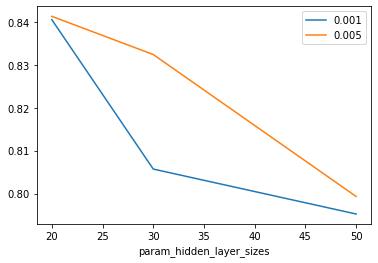

In [33]:
fig, ax = plt.subplots()
grouped = cv_results.groupby('param_alpha')
for key, group in grouped:
    group.plot(ax=ax, x='param_hidden_layer_sizes', y='mean_test_score', label=key)
plt.show()

In [34]:
clf = gs.best_estimator_
clf.fit(boston_train_X_scaled, boston_train_y)

MLPRegressor(alpha=0.005, hidden_layer_sizes=20, learning_rate='adaptive',
             learning_rate_init=0.1, random_state=123)

#### 2.3. 模型评估

调用神经网络回归模型的函数`predict()`预测数值标签。


In [35]:
boston_y_pred = clf.predict(boston_test_X_scaled)


评估模型性能，计算模型的$R^2$、均方误差和均方根误差。


In [36]:
r2_score(boston_test_y, boston_y_pred), mean_squared_error(boston_test_y, boston_y_pred),
                        np.sqrt(mean_squared_error(boston_test_y, boston_y_pred))

(0.7625571431031362, 19.645014148373868, 4.432269638500558)



可以看出，$R^2$远超50\%，有较强的预测能力。

### 3. 多分类问题

读取鸢尾花卉数据集，并划分训练集和测试集。


In [38]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_train_X, iris_test_X, iris_train_y, iris_test_y = train_test_split(iris_X, iris_y, test_size = 0.2, random_state = 123)


调用程序包`sklearn.neural_network`中的构造函数`MLPClassifier()`创建神经网络分类模型，并训练，这里省略超参数调优过程。


In [40]:
clf = MLPClassifier(learning_rate_init=0.1, learning_rate='adaptive', random_state = 123)
clf.fit(iris_train_X, iris_train_y)


MLPClassifier(learning_rate='adaptive', learning_rate_init=0.1,
              random_state=123)


预测类别标签和其概率。


In [41]:
iris_y_pred = clf.predict(iris_test_X)
iris_y_probas = clf.predict_proba(iris_test_X)
iris_y_pred[:5], iris_y_probas[:5]


(array([1, 2, 2, 1, 0]),
 array([[2.79049555e-07, 6.60234743e-01, 3.39764978e-01],
        [3.89623303e-11, 2.12307802e-03, 9.97876922e-01],
        [8.88899955e-14, 2.25045572e-05, 9.99977495e-01],
        [1.33539430e-04, 9.99788448e-01, 7.80125501e-05],
        [9.99694521e-01, 3.05478717e-04, 1.04528051e-18]]))


评估模型性能，计算模型的精度和对数损失。


In [42]:
accuracy_score(iris_test_y, iris_y_pred), log_loss(iris_test_y, iris_y_probas)

(0.9333333333333333, 0.10708973083820833)


可以看出，精度远超50%，有较强的预测能力。

绘制神经网络分类模型在鸢尾花卉数据集的前个变量上的的决策边界。


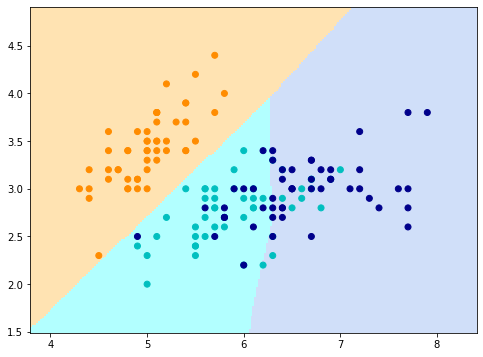

In [43]:
clf.fit(iris_train_X[:,:2], iris_train_y)
h = 0.02
x_min, x_max = iris_X[:, 0].min() - .5, iris_X[:, 0].max() + .5
y_min, y_max = iris_X[:, 1].min() - .5, iris_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize = (8,6))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange', 'cyan', 'cornflowerblue']), alpha=0.3)
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=ListedColormap(['darkorange', 'c', 'darkblue']))
plt.show()



可以看出，神经网络回归模型的决策边界可以是一个不规则超曲面。

### 4. 二分类问题

生成两个交织的半圆环（`moons`）、一个大圆环套小圆环（`circles`）和两组线性可分的点（`linearly_separable`）这三个人工合成数据集。


In [45]:
moons = make_moons(noise=0.3, random_state=0)
circles = make_circles(noise=0.2, factor=0.5, random_state=1)
linearly_separable = make_classification(n_features=2, n_redundant=0, n_informative=1, random_state=8, n_clusters_per_class=1)
synthetic_data = {"moons" : moons, "circles" : circles, "linearly_separable" : linearly_separable}


对数据集`moons`、`circles`和`linearly_separable`分别训练3个决策树分类模型，这里省略超参数调优过程。


In [46]:
clfs = {}
for name, (X, y) in synthetic_data.items():
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 123)
    clf = MLPClassifier(learning_rate_init=0.5, learning_rate='adaptive', random_state = 123)
    clf.fit(train_X, train_y)
    clfs[name] = clf
clfs

{'moons': MLPClassifier(learning_rate='adaptive', learning_rate_init=0.5,
               random_state=123),
 'circles': MLPClassifier(learning_rate='adaptive', learning_rate_init=0.5,
               random_state=123),
 'linearly_separable': MLPClassifier(learning_rate='adaptive', learning_rate_init=0.5,
               random_state=123)}


预测类别标签和其概率。


In [47]:

y_preds = {}
y_probas = {}
for name, (X, y) in synthetic_data.items():
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 123)
    y_preds[name] = clfs[name].predict(test_X)
    y_probas[name] = clfs[name].predict_proba(test_X)



评估模型性能，计算模型的精度、ROC曲线下面积和F1度量。


In [49]:
for name, (X, y) in synthetic_data.items():
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 123)
    print(name, accuracy_score(test_y, y_preds[name]), roc_auc_score(test_y, y_preds[name]), f1_score(test_y, y_preds[name]))


moons 0.85 0.875 0.8571428571428571
circles 0.95 0.9444444444444444 0.9411764705882353
linearly_separable 0.95 0.9444444444444444 0.9411764705882353



可以看出，三个人工合成数据集的精度远超50%，有较强的预测能力。

绘制决策树分类模型的决策边界。


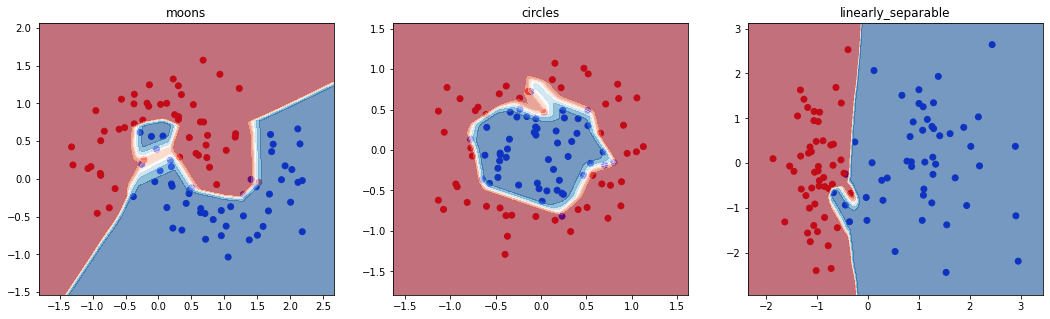

In [52]:
plt.figure(figsize = (18,5))
i = 0
for name, (X, y) in synthetic_data.items():
    plt.subplot(131 + i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clfs[name].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.6)
    plt.title(name)
    i += 1
plt.show()



可以看出，神经网络分类模型的决策边界可以是一个不规则超曲面，可以学习出两个交织的半圆环（`moons`）以及一个大圆环套小圆环（`circles`）这类高度非线性的决策边界。